<a href="https://colab.research.google.com/github/3asys/NN/blob/master/neural_course_02_kaggle_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Соревнования по распознаванию рукописных цифр на Kaggle

Пример кода для отправки решения в соревнование Kaggle - https://www.kaggle.com/c/digit-recognizer/data

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Устанавливаем Kaggle API

In [0]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!ls

kaggle.json  sample_submission.csv  test.csv
sample_data  submission.csv	    train.csv


Копируем токен в каталог .kaggle

In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

## Загружаем данные с сайта Kaggle

In [0]:
!kaggle competitions download -c digit-recognizer

 90% 66.0M/73.2M [00:01<00:00, 43.4MB/s]
100% 73.2M/73.2M [00:01<00:00, 68.7MB/s]
 92% 45.0M/48.8M [00:01<00:00, 16.3MB/s]
100% 48.8M/48.8M [00:01<00:00, 27.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 76.1MB/s]


In [0]:
!ls

sample_data  sample_submission.csv  test.csv  train.csv


## Проверяем формат данных

Данные для обучения

In [0]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

Данные для тестирования

In [0]:
!head test.csv

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pix

Пример файла с решением

In [0]:
!head sample_submission.csv

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Подготовка данных для обучения сети

Загружаем данные для обучения из файла

In [0]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [0]:
train_dataset[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Выделяем данные для обучения

In [0]:
# В x_train записываем все данные из train_dataset, кроме первого столбца
# Для выбора элементов массива Numpy в Python (slicing) используются квадратные скобки
# В скобках два диапазона через запятую: строки и слобцы
# Диапазон указывается через двоеточие
# Например, train_dataset[1:10, 5:20] - выбрасть строки с 1 по 10 (не включая) 
# и столбцы с 5 по 20 (не включая)
# Если начало диапазона не указано, значит выбирается с 0 элемента
# Если конец не указан, значит выбирается до посленего элемента
# train_dataset[:, 1:] - для строк не указаны ни начальный, ни конечный номер,
# значит выбираются все строки. Для столбцов диапазон 1: , значит выбираются 
# столбцы начиная с 1 и до последнего (столбец с меткой имеет номер 0)
x_train = train_dataset[:, 1:]

Нормализуем данные для обучения

In [0]:
x_train /= 255.0

In [0]:
x_train[:5, 440:450]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99607843, 0.99607843, 0.99607843, 0.06666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.27058824, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.49803922, 0.99215686, 0.99215686, 0.99215686, 0.50588235,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Выделяем правильные ответы

In [0]:
y_train = train_dataset[:, 0]

Преобразуем ответы в формат one hot encoding

In [0]:
y_train = utils.to_categorical(y_train)

In [0]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [0]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


**Компилируем сеть**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)

Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
33600/33600 [==============================] - 1s 43us/sample - loss: 0.3563 - acc: 0.8988 - val_loss: 0.2010 - val_acc: 0.9448
Epoch 2/30
33600/33600 [==============================] - 1s 33us/sample - loss: 0.1518 - acc: 0.9577 - val_loss: 0.1404 - val_acc: 0.9573
Epoch 3/30
33600/33600 [==============================] - 1s 33us/sample - loss: 0.0992 - acc: 0.9726 - val_loss: 0.1091 - val_acc: 0.9681
Epoch 4/30
33600/33600 [==============================] - 1s 32us/sample - loss: 0.0726 - acc: 0.9791 - val_loss: 0.0920 - val_acc: 0.9724
Epoch 5/30
33600/33600 [==============================] - 1s 32us/sample - loss: 0.0522 - acc: 0.9858 - val_loss: 0.0935 - val_acc: 0.9727
Epoch 6/30
33600/33600 [==============================] - 1s 32us/sample - loss: 0.0390 - acc: 0.9896 - val_loss: 0.0857 - val_acc: 0.9735
Epoch 7/30
33600/33600 [==============================] - 1s 33us/sam

## Визуализация качества обучения


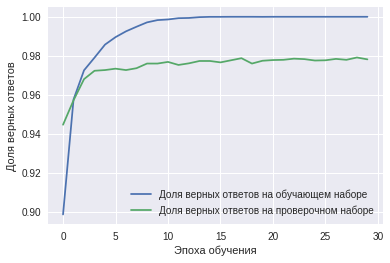

In [0]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем данные для распознавания

In [0]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [0]:
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Нормализация данных

In [0]:
x_test = test_dataset / 255.0

In [0]:
x_test[:5, 440:450]

array([[0.82352941, 0.10588235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.05882353, 0.58039216, 0.98823529, 0.98823529,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

## Запускаем распознавание рукописных цифр из тестового набора данных

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[:5]

array([[3.39148794e-13, 5.47367863e-23, 1.00000000e+00, 9.01322406e-14,
        6.19567603e-13, 4.28248690e-20, 8.48805957e-15, 3.19397083e-14,
        6.46102206e-15, 2.69767958e-18],
       [1.00000000e+00, 1.94855864e-14, 1.44947665e-11, 1.30962981e-12,
        6.18729047e-17, 3.31245698e-09, 2.15883266e-11, 5.18912240e-11,
        3.30751946e-13, 1.93980908e-16],
       [8.09003559e-11, 3.82461103e-08, 8.34811601e-07, 1.84080618e-05,
        3.05098984e-05, 1.49515969e-07, 4.01539996e-10, 8.74620582e-07,
        1.25109473e-05, 9.99936700e-01],
       [3.18134204e-02, 1.29877771e-12, 2.56594882e-04, 2.97706038e-06,
        9.33031726e-04, 8.94931962e-10, 3.38642735e-07, 1.05507468e-06,
        1.19259710e-07, 9.66992438e-01],
       [1.18866757e-11, 1.73169479e-09, 2.59356475e-05, 9.99971867e-01,
        2.12648658e-19, 6.73284944e-07, 2.58882922e-13, 3.42159374e-12,
        1.42835415e-06, 4.60530947e-09]], dtype=float32)

Преобразуем результаты распознавания из формата one hot encoding в цифры

In [0]:
predictions = np.argmax(predictions, axis=1)

In [0]:
predictions[:5]

array([2, 0, 9, 9, 3])

## Готовим файл с решением для Kaggle

In [0]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [0]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 9],
       [5, 3]])

Записываем результаты в файл 

In [0]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")

In [0]:
!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


## Отправляем решение на соревнование

In [0]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab" -f submission.csv

100% 208k/208k [00:04<00:00, 46.0kB/s]
Successfully submitted to Digit Recognizer

## Домашнее задание

1. Используйте шаблон ноутбука, чтобы отправить решение на Kaggle.
2. Попробуйте изменить нейронную сеть, чтобы улучшить качество решения:
    * Изменяйте количество нейронов в слоях
    * Добавляйте новые скрытые слои
    * Изменяйте количество эпох обучения
    * Изменяйте размер мини-выборки (batch_size)
3. Во время обучения следите, чтобы не возникло переобучения.
4. После подбора лучших гиперпараметров, обучите сеть еще раз на полном объеме данных без разделения на обучающий и проверочный наборы.
5. Составьте отчет, который включает:
     * Место в соревновании, которое вам удалось достичь
     * Описание архитектуры нейронной сети и гиперпараметров обучения
     * Ссылку на ноутбук с кодом обучения
     * График качества обучения на обучающем и проверочном наборах данных

